# Extract frames from videos

Pull frames from video files at specified intervals for analysis, thumbnails, or training data.

## Problem

You have video files and need to extract frames for:

- Object detection on video content
- Creating thumbnails or previews
- Building training datasets
- Scene analysis and classification

| Video | Duration | Frames at 1 FPS |
|-------|----------|-----------------|
| interview.mp4 | 30 min | 1,800 frames |
| product_demo.mp4 | 5 min | 300 frames |
| surveillance.mp4 | 1 hour | 3,600 frames |

## Solution

**What's in this recipe:**

- Extract frames at a fixed rate (FPS)
- Extract a specific number of frames
- Extract only keyframes for efficiency

You create a view with a `frame_iterator` that automatically extracts frames from each video. New videos are processed without extra code.

### Setup

In [ ]:
%pip install -qU pixeltable

In [ ]:
import pixeltable as pxt
from pixeltable.functions.video import frame_iterator

### Load videos

In [3]:
# Create a fresh directory
pxt.drop_dir('video_demo', force=True)
pxt.create_dir('video_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/pjlb/.pixeltable/pgdata
Created directory 'video_demo'.


In [4]:
# Create table for videos
videos = pxt.create_table('video_demo/videos', {'video': pxt.Video})

Created table 'videos'.


In [5]:
# Insert a sample video
videos.insert([
    {'video': 'https://raw.githubusercontent.com/pixeltable/pixeltable/main/docs/resources/bangkok.mp4'}
])

Inserting rows into `videos`: 1 rows [00:00, 212.90 rows/s]
Inserted 1 row with 0 errors.


1 row inserted, 2 values computed.

### Extract frames at fixed rate

Create a view that extracts 1 frame per second:

In [ ]:
# Extract 1 frame per second
frames = pxt.create_view(
    'video_demo/frames',
    videos,
    iterator=frame_iterator(
        videos.video,
        fps=1.0  # 1 frame per second
    )
)

Inserting rows into `frames`: 19 rows [00:00, 8687.65 rows/s]


frame,pos
,0
,1
,2

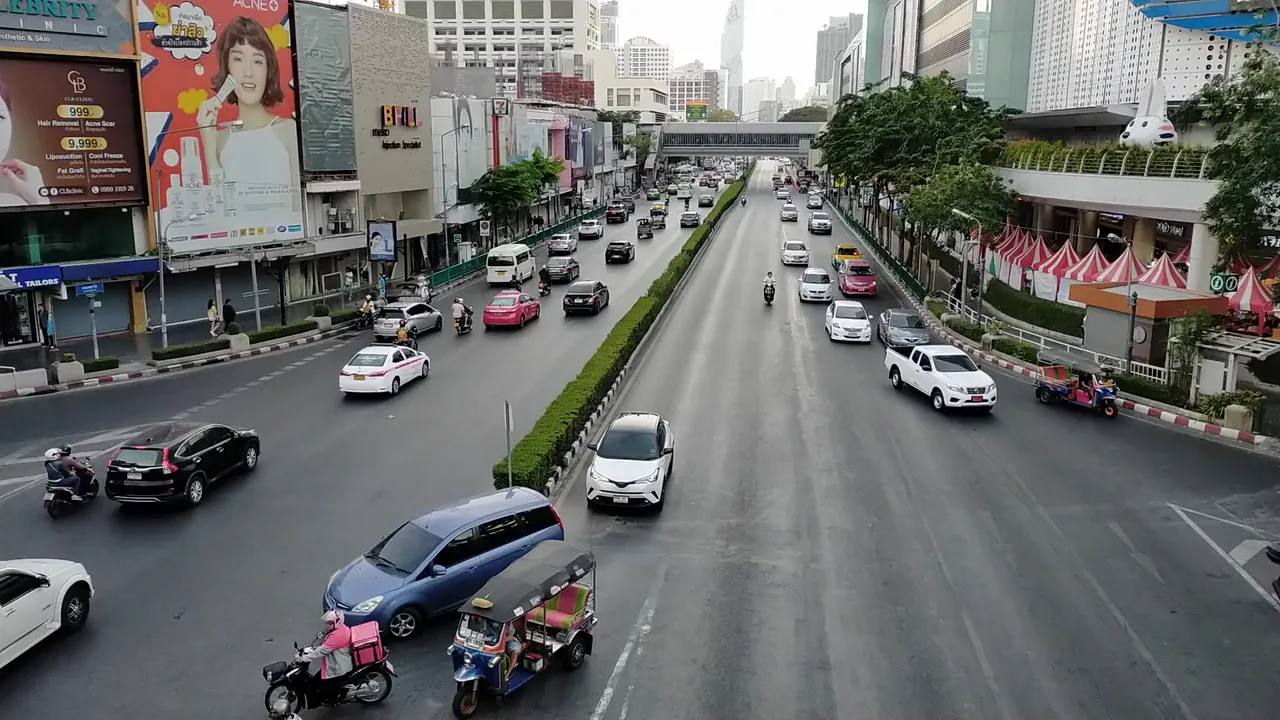
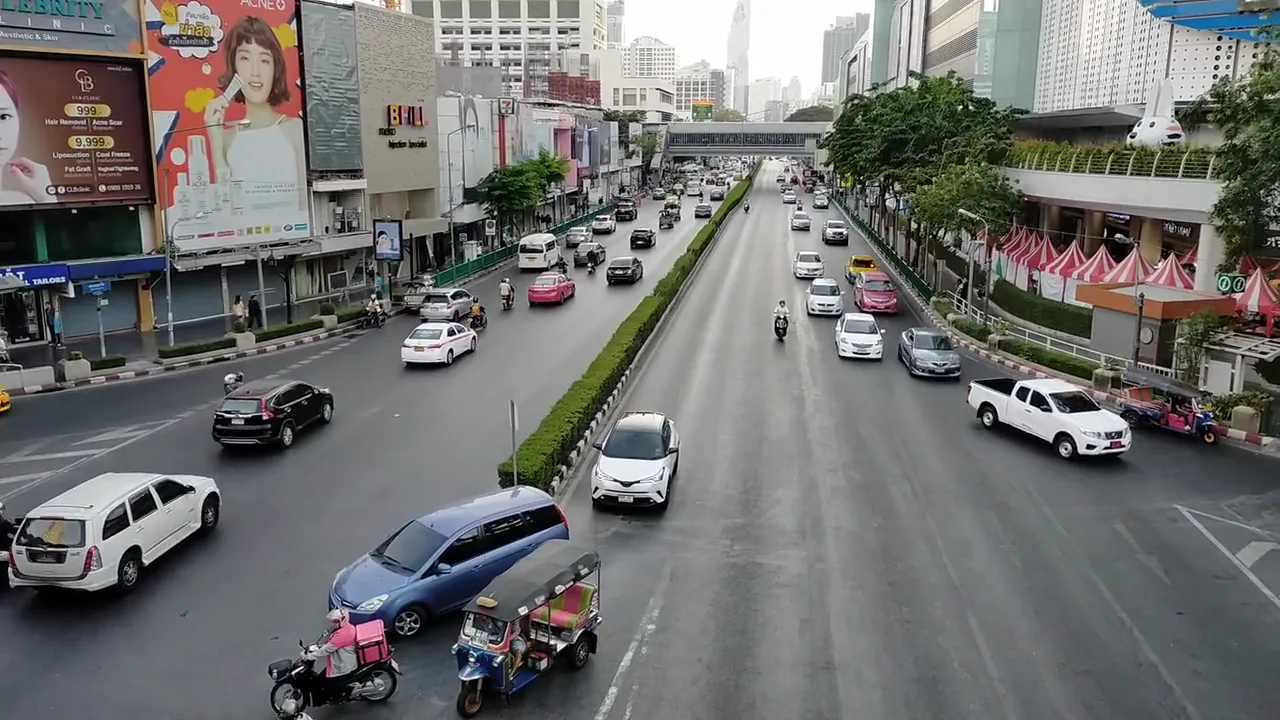
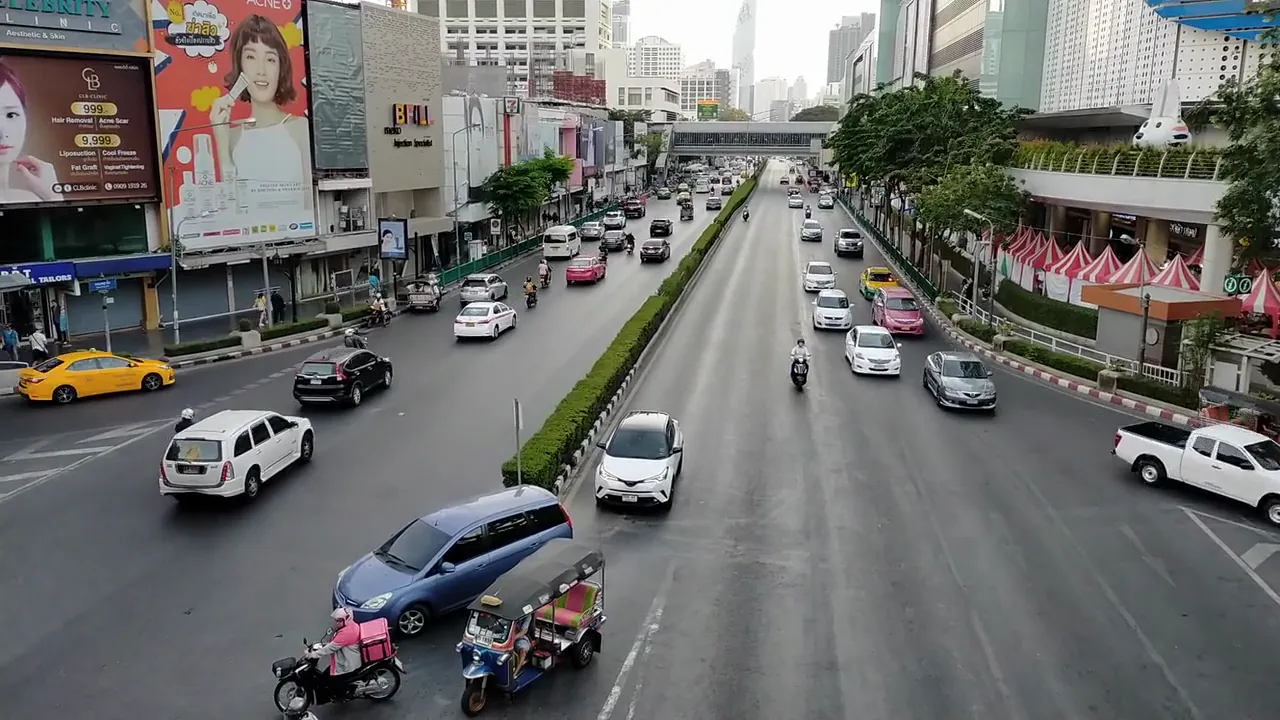

In [7]:
# View extracted frames
frames.select(frames.frame, frames.pos).head(3)

### Extract keyframes only

For faster processing, extract only keyframes (I-frames):

Inserting rows into `keyframes`: 7 rows [00:00, 3277.53 rows/s]


frame
""
""
""

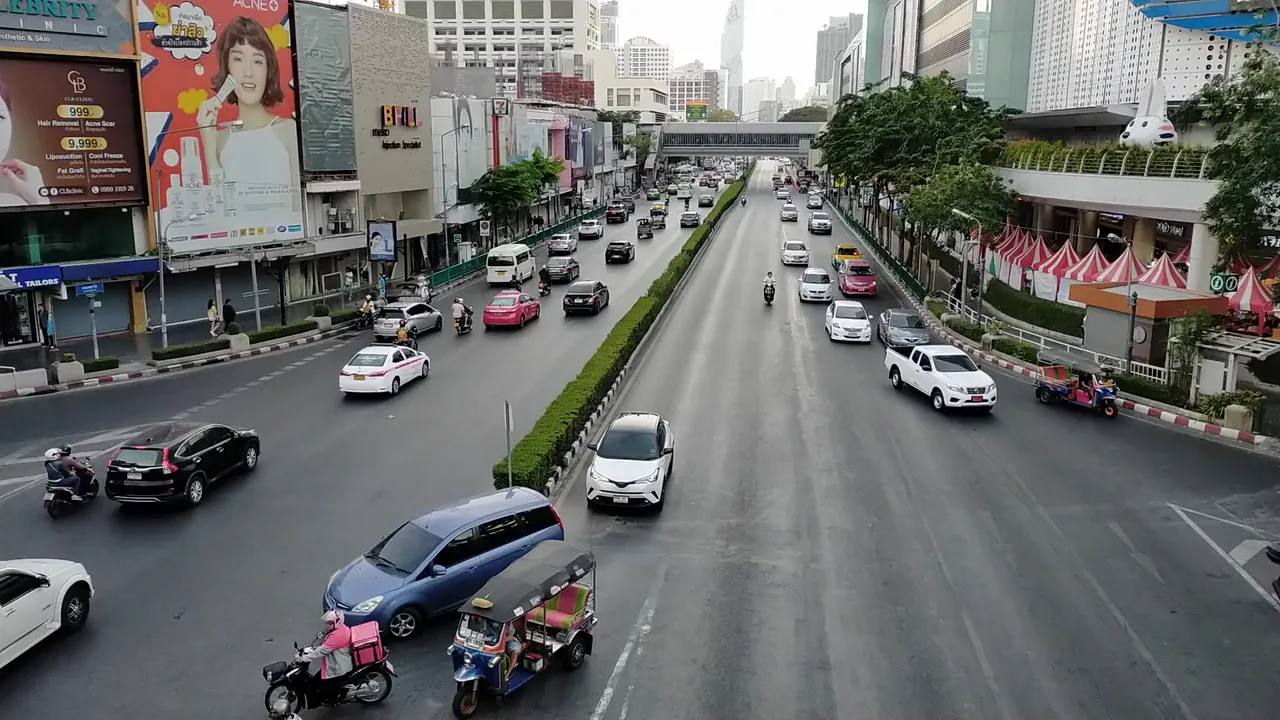
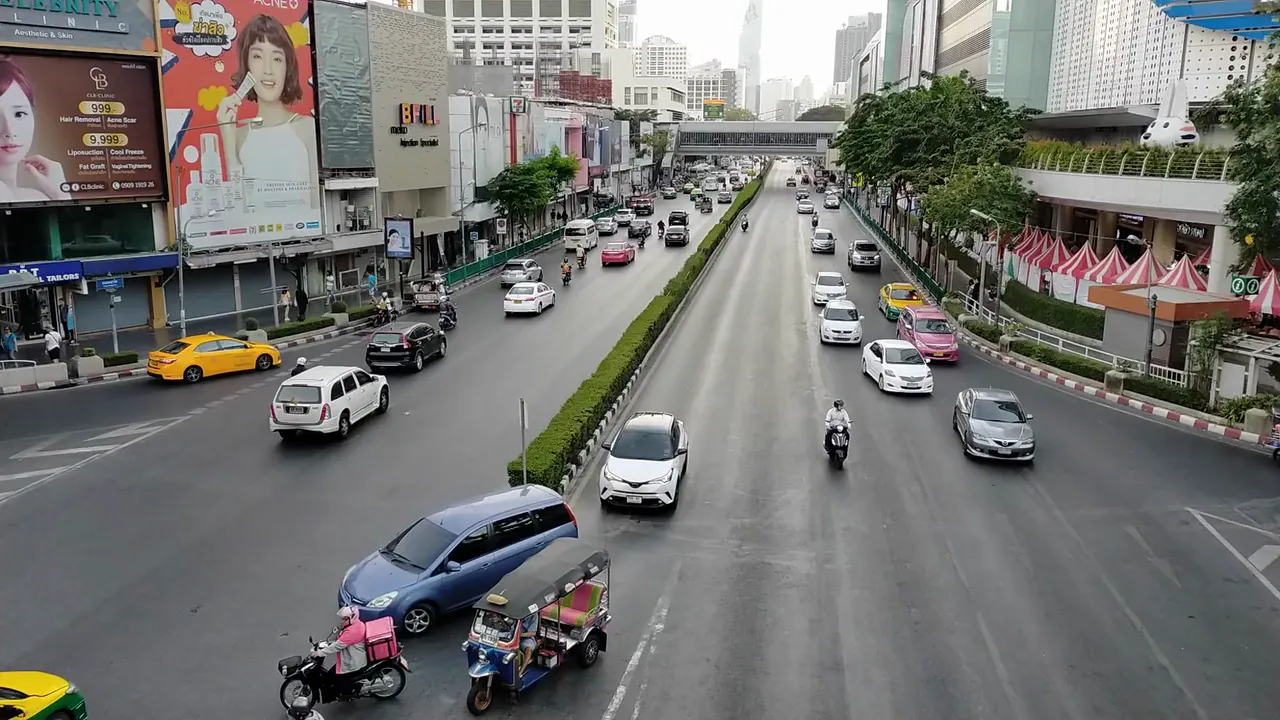
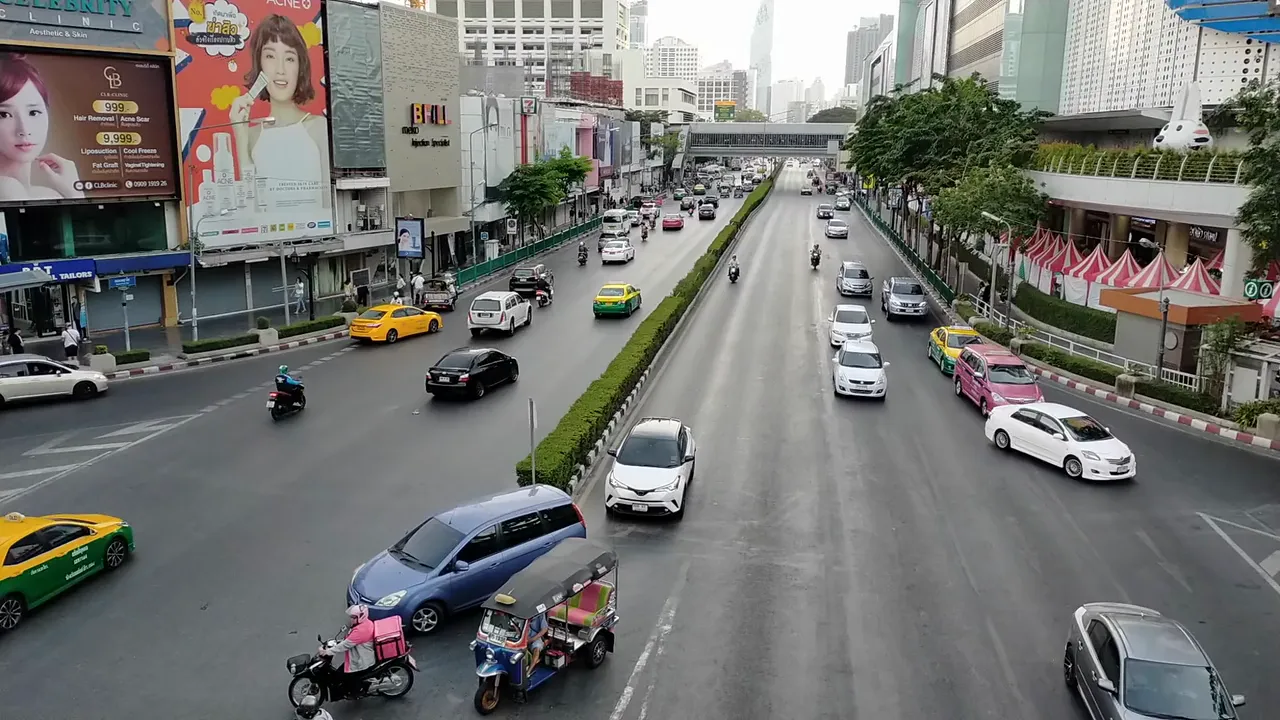

In [ ]:
# Extract only keyframes (much faster for long videos)
keyframes = pxt.create_view(
    'video_demo/keyframes',
    videos,
    iterator=frame_iterator(
        videos.video,
        keyframes_only=True
    )
)
keyframes.select(keyframes.frame).head(3)

## Explanation

**Extraction options:**

| Parameter | Description |
|-----------|-------------|
| `fps=1.0` | Extract at 1 frame per second |
| `fps=0.5` | Extract every 2 seconds |
| `num_frames=10` | Extract exactly 10 evenly-spaced frames |
| `keyframes_only=True` | Extract only I-frames (fastest) |

Only one of `fps`, `num_frames`, or `keyframes_only` can be specified.

**When to use keyframes:**

- Quick video scanning and thumbnails
- Initial content classification
- Processing very long videos

**Frame metadata:**

Each frame includes:

- `frame`: The extracted image
- `pos`: Frame position in the video
- `pts`: Presentation timestamp

## See also

- [Iterators documentation](https://docs.pixeltable.com/platform/iterators)
- [Analyze images in batch](https://docs.pixeltable.com/howto/cookbooks/images/vision-batch-analysis)